# *Customer Analytics through Segmentation, Market-Basket Analysis and Predictive Analytics*

## Project overview and problem statement

As customers are more empowered and connected to information at any instance of time, customer analytics is critical to deliver values to customers. This project will examine a year of online transaction data from an online retail gift store in an attempt to identify customer segments, purchasing patterns and predicting customer behavior. Many of the company's customers are wholesalers. The goal is to provide insights to increase effectiveness of marketing and sales efforts to customers.

The project will be broken down into 3 parts:
- Part I
 RFM based Customer segmentation using k-means clustering
- Part II
 Market Basket Analysis on each segments to identify purchasing pattern using Association Analysis
- Part III
 Predicting behavior using BG/NBD model and Gamma-Gamma model via Lifetimes Python library
 
The dataset used for this project can be found at: https://archive.ics.uci.edu/ml/datasets/Online+Retail.


## Part I - RFM based customer segmentation using k-means clustering

### Segmentation Goal
![Segmentation Basics](https://36bvmt283fg61unuud3h7qua-wpengine.netdna-ssl.com/wp-content/uploads/2014/07/segments.jpg)


The most common type of customer segmentation are geographical, demographic, psychographic and behavior. Determining geographical segment first is important to understand the catchment area. Thus, I will pick the single location with the highest instances (United Kindom) and perform behavior segmentation based on the RFM model.

RFM refers to customer's recency of last purchase, frequency of purchase and monetary value. It is often used in customer segmentation for marketing purposes.

The goal is to segment customers into different lifecycle stages for marketing and sales purposes.

### Why k-means clustering? 

 - An unsupervised learning technique to determine clusters or segments based on input variables of interest, in this case, RFM
 - Clusters can then be meaningfully interpreted

### Getting started

In [94]:
# Doing all the necessary imports here 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
%matplotlib inline 
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)


Populating the interactive namespace from numpy and matplotlib


/Users/kamtingcheung/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Import the data

In [2]:
online_sales = pd.read_csv("../project-capstone/Online_Retail.csv", parse_dates=True)

In [3]:
online_sales.shape

(541909, 8)

In [4]:
online_sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Data Dictionary

In [5]:
Variable = ['InvoiceNo', 'StockCode', 'Description', 'Quantity',
            'InvoiceDate','UnitPrice','CustomerID','Country'
           ]
Data_type = ['Nominal','Nominal','Nominal','Numeric',
             'Numeric','Numeric','Nominal','Nominal'
            ]
Description = ['Invoice number. 6-digit number uniquely assigned to each transaction ("C******" == cancellation)',
               'Product (item) code. 5-digit integral number uniquely assigned to each distinct product',
               'Product (item) name', 'The quantities of each product (item) per transaction',
               'Invoice Date and time. Day and time of each transaction from 01/12/2010 to 09/12/2011',
               'Unit price. Product price per unit in sterling',
               'Customer number. 5-digit integral number uniquely assigned to each customer',
               'Country name. Name of the country where each customer resides'
              ]

data_dict = pd.DataFrame()

data_dict['Variable'] = Variable
data_dict['Data_type'] = Data_type
data_dict['Description'] = Description
data_dict.index = [i+1 for i in range(8)]

pd.options.display.max_colwidth = 100
data_dict.head(8)

,Variable,Data_type,Description
1,InvoiceNo,Nominal,"Invoice number. 6-digit number uniquely assigned to each transaction (""C******"" == cancellation)"
2,StockCode,Nominal,Product (item) code. 5-digit integral number uniquely assigned to each distinct product
3,Description,Nominal,Product (item) name
4,Quantity,Numeric,The quantities of each product (item) per transaction
5,InvoiceDate,Numeric,Invoice Date and time. Day and time of each transaction from 01/12/2010 to 09/12/2011
6,UnitPrice,Numeric,Unit price. Product price per unit in sterling
7,CustomerID,Nominal,Customer number. 5-digit integral number uniquely assigned to each customer
8,Country,Nominal,Country name. Name of the country where each customer resides


### Basic data inspection and cleaning

In [6]:
online_sales.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Malta', 'RSA'], dtype=object)

In [7]:
online_sales.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [8]:
online_sales.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
# Drop missing ID numbers as this is segmentation at customer level
online_sales.drop(online_sales['CustomerID'][online_sales.CustomerID.isnull()].index, inplace=True)

In [10]:
# Drop all other countries except United Kingdom
online_sales.drop(online_sales['Country'][online_sales.Country != 'United Kingdom'].index, inplace=True)

In [11]:
online_sales.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
# Final instance count
print 'unique invoices: ', online_sales.InvoiceNo.nunique()
print 'unique customers: ', online_sales.CustomerID.nunique()

unique invoices:  19857
unique customers:  3950


In [13]:
print online_sales['InvoiceDate'].dtypes

print type(online_sales.at[0, 'InvoiceDate'])

object
<type 'str'>


In [14]:
# Convert CustomerID type from float to integer
online_sales['CustomerID'] = online_sales.CustomerID.astype(int)

In [15]:
online_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      361878 non-null object
StockCode      361878 non-null object
Description    361878 non-null object
Quantity       361878 non-null int64
InvoiceDate    361878 non-null object
UnitPrice      361878 non-null float64
CustomerID     361878 non-null int64
Country        361878 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 34.8+ MB


## Data preprocessing - Recency, Frequency, Monetary

### Recency

In [16]:
online_sales['InvoiceDate'] = pd.to_datetime(online_sales['InvoiceDate'])
#online_sales['Date'] = online_sales['InvoiceDate'].dt.date
#online_sales['Time'] = online_sales['InvoiceDate'].dt.time

In [17]:
print online_sales['InvoiceDate'].max()

2011-12-09 12:49:00


For Recency calculation, assume latest transaction date as current date.

Recency would be how many days **before** a customer made a purchase with respect to 12/9/2011. 

In [18]:
# Calculate Recency value
online_sales['Recency'] = abs(online_sales['InvoiceDate']-online_sales['InvoiceDate'].max())/ np.timedelta64(1, 'D')

In [19]:
online_sales.Recency.describe()

count    361878.000000
mean        151.542219
std         113.298270
min           0.000000
25%          47.048611
50%         130.987500
75%         246.808333
max         373.182639
Name: Recency, dtype: float64

In [20]:
Recency = online_sales.groupby('CustomerID')['Recency'].min()

In [21]:
Recency.describe()

count    3950.000000
mean       91.307281
std       100.235418
min         0.000000
25%        16.146007
50%        49.732639
75%       142.959375
max       373.122222
Name: Recency, dtype: float64

In [22]:
Recency = Recency.to_frame()

In [23]:
Recency.rename(columns={'':'Recency'}, inplace=True)

In [24]:
#Recency['Recency'] = Recency['Recency'].astype(int)

### Frequency

Frequency refers to the number of invoices with purchases.

In [25]:
Frequency = online_sales.groupby('CustomerID')['InvoiceNo'].nunique()

In [26]:
Frequency = Frequency.to_frame()

In [27]:
Frequency.rename(columns={'InvoiceNo':'Frequency'}, inplace=True)

In [28]:
Frequency.describe()

,Frequency
count,3950.000000
mean,5.027089
std,8.717306
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,224.000000


### Monetary

Monetary refers to the amount of money a customer has spent.

In [29]:
# Create aggregated variable, Amount, using Quantity*Price
online_sales['Amount'] = online_sales.Quantity*online_sales.UnitPrice

In [30]:
Monetary = online_sales.groupby('CustomerID')['Amount'].sum()

In [31]:
Monetary = Monetary.to_frame()

In [32]:
Monetary.rename(columns={'Amount':'Monetary'}, inplace=True)

In [33]:
Monetary.describe()

,Monetary
count,3950.000000
mean,1713.385669
std,6548.608224
min,-4287.630000
25%,282.255000
50%,627.060000
75%,1521.782500
max,256438.490000


In [34]:
Monetary[Monetary["Monetary"]<0].count()

Monetary    38
dtype: int64

In [35]:
# Investigate where negative amount came from
online_sales[online_sales['Amount']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Amount
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,373.130556,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,373.125000,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,373.100694,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,373.100694,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,373.100694,-6.96
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,373.100694,-6.96
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548,United Kingdom,373.100694,-41.40
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,373.100694,-19.80
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548,United Kingdom,373.100694,-39.60
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897,United Kingdom,373.007639,-25.50


There are 38 customers that have negative monetary values. They must have returned their purchases as denoted by InvoiceNo starting with 'C'. I reset their monetary value to 0 rather than dropping them as their Recency and Frequency values still matter.

In [36]:
Monetary[Monetary["Monetary"]<0] = 0

### Joining  RFM values by CustomerID

In [37]:
RFM = pd.concat([Recency,Frequency,Monetary], axis=1, join='inner')

In [38]:
RFM.head(20)

,Recency,Frequency,Monetary
CustomerID,,,
12346,325.105556,2,0.00
12747,1.927083,11,4196.01
12748,0.020139,224,29072.10
12749,3.120139,8,3868.20
12820,2.900694,4,942.34
12821,213.873611,1,92.72
12822,70.114583,3,918.98
12823,74.218056,5,1759.50
12824,59.000000,1,397.12


## EDA of features and their relationship

### Top 10 customers based on frequency

In [39]:
top_freq = RFM.sort_values('Frequency',ascending=False)
top_freq.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12748,0.020139,224,29072.10
17841,1.029167,169,40340.78
14606,0.722917,128,11713.85
13089,2.157639,118,57385.88
15311,0.034028,118,59419.34
12971,3.020139,89,10930.26
14527,2.020833,86,7711.38
13408,1.155556,81,27487.41
16029,38.098611,76,50992.61


### Top 10 customers based on monetary

In [40]:
top_mon = RFM.sort_values('Monetary',ascending=False)
top_mon.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
18102,0.040972,62,256438.49
17450,7.972222,55,187482.17
17511,2.109028,46,88125.38
16684,3.946528,31,65892.08
13694,3.136806,60,62653.10
15311,0.034028,118,59419.34
13089,2.157639,118,57385.88
14096,3.813889,34,57120.91
15061,3.029861,55,54228.74


The top 10 customers based on Frequency and Monetary show some outliers in the customer base. I will elaborate the handling of thess outliers at a later part.

### Visualizing the features

In [41]:
sns.pairplot(RFM)

All 3 features show positive skewness and Monetary is on a different scale compared to Recency and Frequency. Therefore, I will apply a log transformation to resolve these two issues.

In [42]:
# These columns contains zeros. Need to add a small value for log transformation
RFM['Monetary'] = RFM['Monetary'] + 1
RFM['Recency'] = RFM['Recency'] + 1

In [43]:
log_RFM = RFM.apply(np.log)

In [44]:
log_RFM.columns = ['log_Recency', 'log_Frequency','log_Monetary']

In [45]:
log_RFM

,log_Recency,log_Frequency,log_Monetary
CustomerID,,,
12346,5.787221,0.693147,0.000000e+00
12747,1.074006,2.397895,8.342128e+00
12748,0.019939,5.411646,1.027757e+01
12749,1.415887,2.079442,8.260803e+00
12820,1.361155,1.386294,6.849427e+00
12821,5.370050,0.000000,4.540312e+00
12822,4.264292,1.098612,6.824352e+00
12823,4.320391,1.609438,7.473353e+00
12824,4.094345,0.000000,5.986753e+00


In [46]:
log_RFM.describe()

,log_Recency,log_Frequency,log_Monetary
count,3950.000000,3950.000000,3950.000000
mean,3.769396,1.068716,6.447532
std,1.407869,0.952122,1.416211
min,0.000000,0.000000,0.000000
25%,2.841765,0.000000,5.646347
50%,3.926569,1.098612,6.442636
75%,4.969531,1.609438,7.328295
max,5.924583,5.411646,12.454648


In [47]:
sns.pairplot(log_RFM)

After the log transformation, we can see a better scattering of high monetary, high frequency customers in the pair plot. There are also a few low value, low frequency customers. But the points still do not show any clear clusters.

### Handling of outliers

k-means clustering is sensitive to outliers leading to distorted cluster or outliers being clustered in a tiny group. This is why outliers are often excluded from the clustering. However, in the context of customer segmentation, outliers may be the most important customers to understand (i.e high monetary, high frequency customers which businesses want to maximise, low monetary, low frequency customers which businesses want to improve on). Therefore, outliers are included in the clustering.

## Running k-means clustering

Since there is no obvious clusters from the previous scatter plots and there is no requirement on a fixed number of clusters, the objective is to produce clusters that make sense in identifying high RFM and low RFM customers.

The result of running k-means clustering algorithm are:
 - Centroids of the k clusters
 - Labels for the data

In [48]:
#Increasing k to run k-means clustering to assist in identifying optimal k.

from sklearn.cluster import KMeans, k_means

model2 = KMeans(n_clusters=2, random_state=0).fit(log_RFM)
predicted2 = model2.labels_
centroids2 = model2.cluster_centers_

print "Predicted clusters to points: ", predicted2
print "Location of centroids: "
print centroids2

print '-----------------------------------------------------------\n'

model3 = KMeans(n_clusters=3, random_state=0).fit(log_RFM)
predicted3 = model3.labels_
centroids3 = model3.cluster_centers_

print "Predicted clusters to points: ", predicted3
print "Location of centroids: "
print centroids3

print '-----------------------------------------------------------\n'


model4 = KMeans(n_clusters=4, random_state=0).fit(log_RFM)
predicted4 = model4.labels_
centroids4 = model4.cluster_centers_

print "Predicted clusters to points: ", predicted4
print "Location of centroids: "
print centroids4

print '-----------------------------------------------------------\n'


model5 = KMeans(n_clusters=5, random_state=0).fit(log_RFM)
predicted5 = model5.labels_
centroids5 = model5.cluster_centers_

print "Predicted clusters to points: ", predicted5
print "Location of centroids: "
print centroids5

print '-----------------------------------------------------------\n'

model6 = KMeans(n_clusters=6, random_state=0).fit(log_RFM)
predicted6 = model6.labels_
centroids6 = model6.cluster_centers_

print "Predicted clusters to points: ", predicted6
print "Location of centroids: "
print centroids6

print '-----------------------------------------------------------\n'

Predicted clusters to points:  [1 0 0 ..., 0 0 0]
Location of centroids: 
[[ 2.63874595  1.87351282  7.51117637]
 [ 4.61838519  0.46440454  5.64885552]]
-----------------------------------------------------------

Predicted clusters to points:  [1 2 2 ..., 0 2 0]
Location of centroids: 
[[ 3.60598925  1.17413189  6.74288818]
 [ 4.93970435  0.28135523  5.27673574]
 [ 1.91598622  2.3248679   8.03287054]]
-----------------------------------------------------------

Predicted clusters to points:  [1 2 2 ..., 3 2 0]
Location of centroids: 
[[ 4.1672507   1.40748733  7.10842847]
 [ 5.14457189  0.25705289  5.21419037]
 [ 1.91671245  2.37192964  8.07733233]
 [ 2.90141914  0.6311655   5.90939259]]
-----------------------------------------------------------

Predicted clusters to points:  [4 0 0 ..., 3 0 2]
Location of centroids: 
[[ 1.83723603  2.4165962   8.1340837 ]
 [ 5.09362236  0.30829197  5.55184288]
 [ 3.99725916  1.5060465   7.19546392]
 [ 2.82015025  0.63326673  5.90515875]
 [ 5.015599

Examing the centroid feature weights can be used to qualitatively interpret what kind of group each cluster represents. However, the log transformation makes it hard to interpret. A cleaner way to interpret clusters is to do descriptive statistics on the original features after I have evaluated the clusters.

## Cluster evaluation

### Plot inertia score for the different k clusters

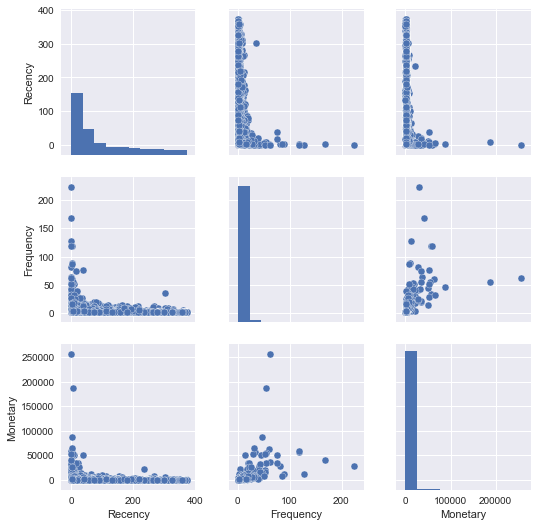

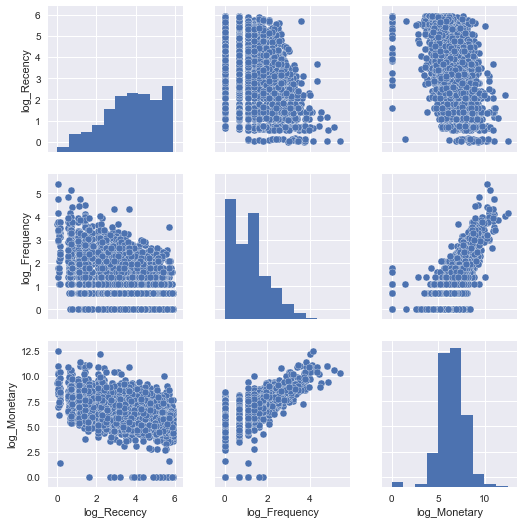

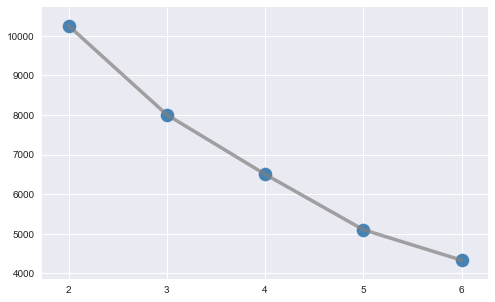

In [49]:
from sklearn import cluster, metrics

inertias = []
for k in [2,3,4,5,6]:
    km = cluster.KMeans(n_clusters=k, random_state=0)
    km.fit(log_RFM)
    inertias.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(8,5))
ax.plot([2,3,4,5,6], inertias, c='grey', lw=3.5, alpha=0.7)
ax.scatter([2,3,4,5,6], inertias, c='steelblue', s=175)
plt.show()

Inertia is the within-cluster sum of squares criterion. It can be recognized as a measure of internal coherence.

Inertia may not be a good score to measure the clusters in this case as the clusters may be elongated.

The elbow plot does not suggest any obvious cluster number either.

### Compute and plot silhouette score

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.40950099935


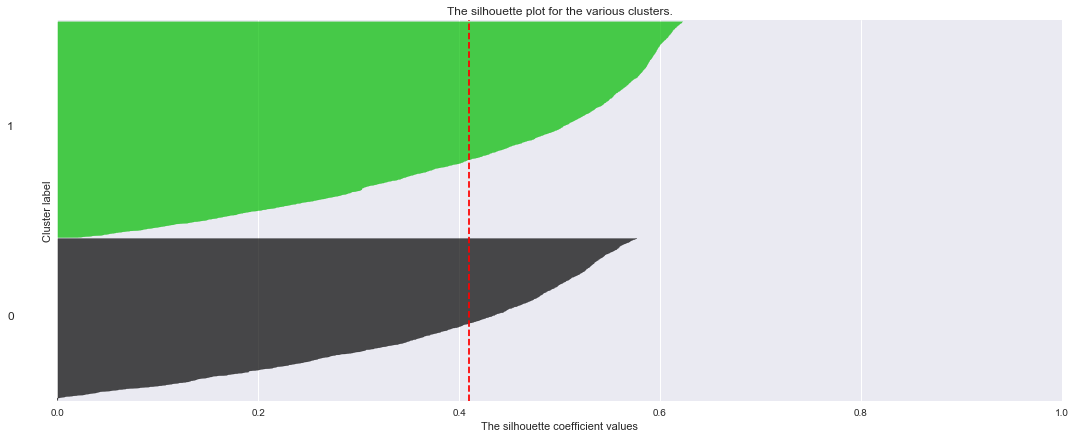

For n_clusters = 3 The average silhouette_score is : 0.315504071948


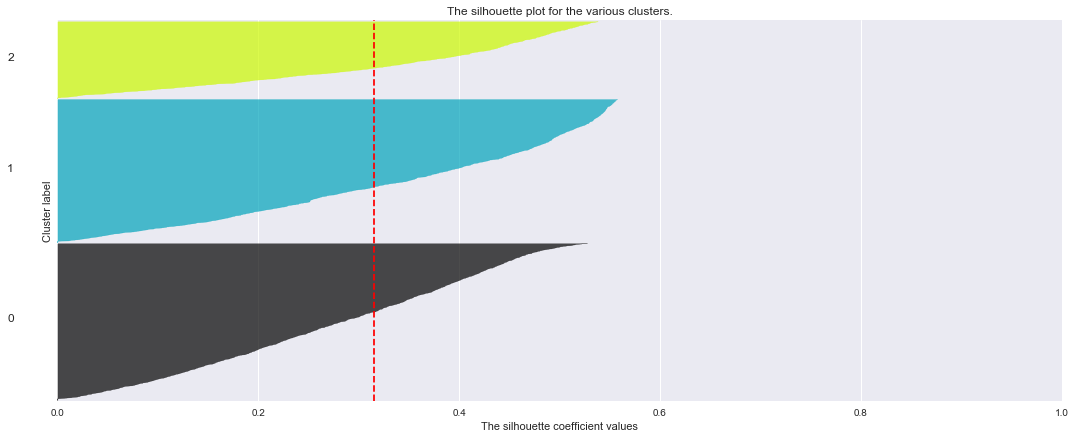

For n_clusters = 4 The average silhouette_score is : 0.32752920111


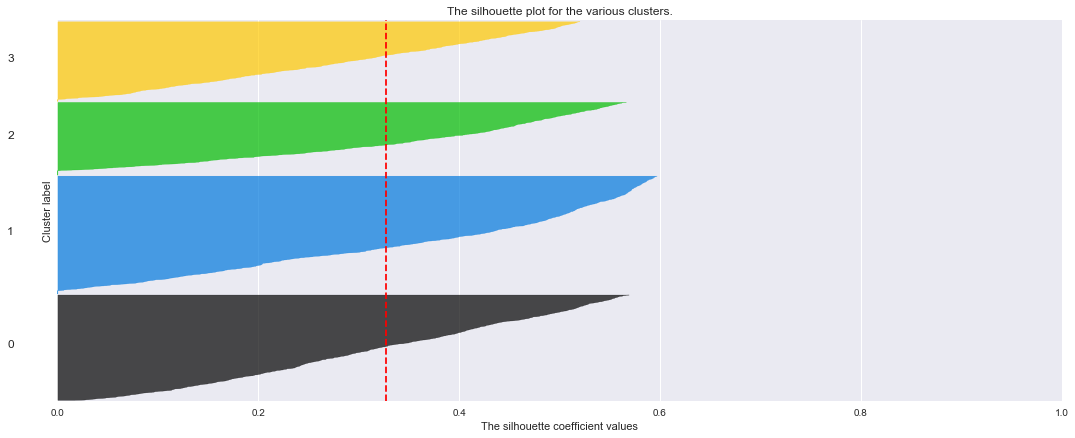

For n_clusters = 5 The average silhouette_score is : 0.351134992028


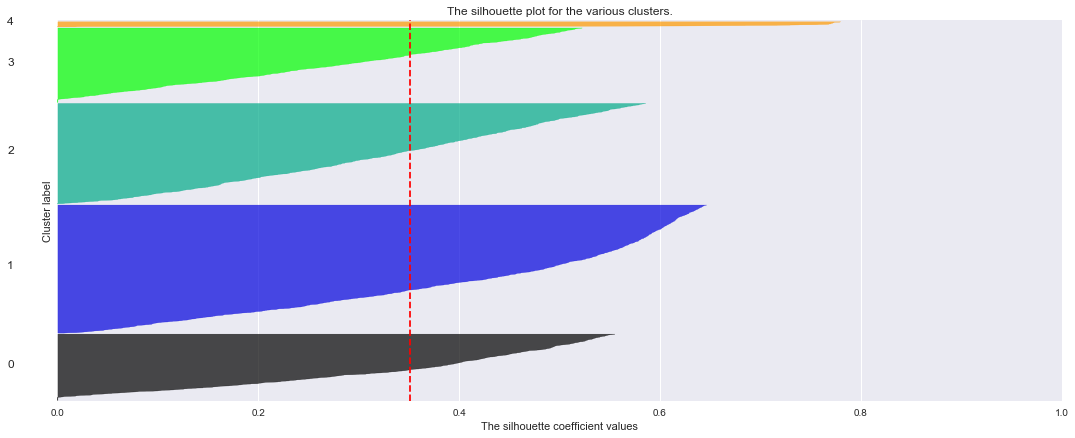

For n_clusters = 6 The average silhouette_score is : 0.329971918011


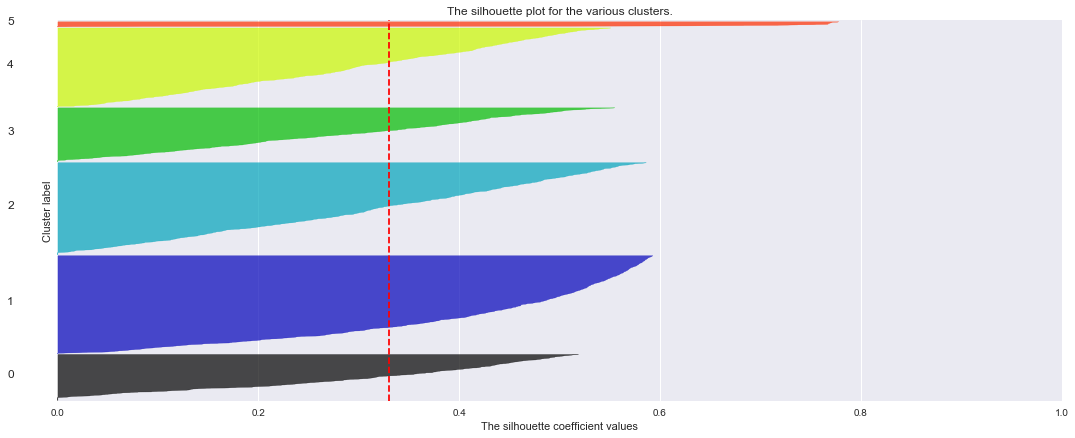

In [50]:
from __future__ import print_function

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

print(__doc__)

X = log_RFM
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    
    # Create a subplot
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # Plotting the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [0, 1]
    ax1.set_xlim([0, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 0 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, random_state=0)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    #colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                #c=colors)

    # Labeling the clusters
    # centers = clusterer.cluster_centers_
    
    plt.show()


The silhouette plot shows that the n_clusters value of 5 and 6 are a bad pick for the given data due to wide fluctuations in the size of the silhouette plots. Silhouette analysis is more ambivalent in deciding between 2, 3 and 4.

Even though n_cluster = 2 has the highest average silhouette score (0.409), n_cluster = 4 has a slightly lower average silhouette score (0.327) but the thickness of the clusters are much more even.

Therefore, n_cluster = 4 should be the optimal value.

## Interpreting the result

### Visualizing clusters with pairplots

In [51]:
log_RFM['Cluster'] = predicted4

In [52]:
sns.pairplot(log_RFM, hue='Cluster')

### Visualizing clusters with 3D plot

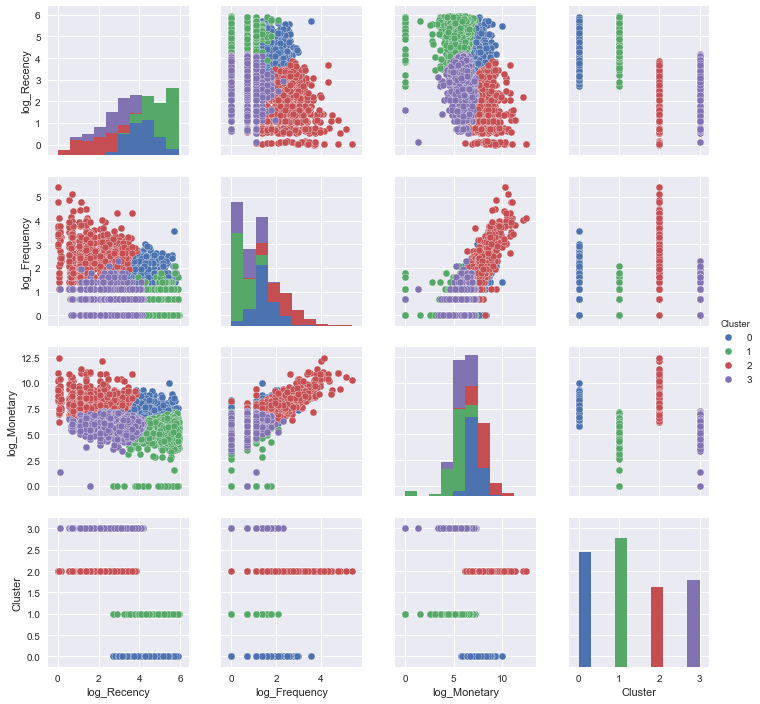

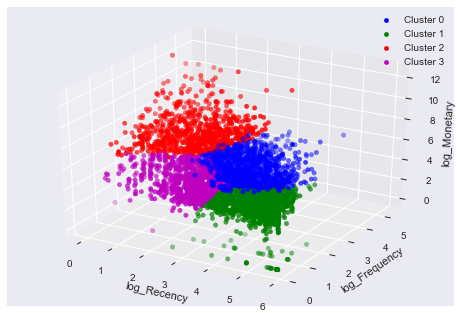

In [53]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

c0 = ax.scatter(log_RFM['log_Recency'][log_RFM['Cluster']==0], log_RFM['log_Frequency'][log_RFM['Cluster']==0], log_RFM['log_Monetary'][log_RFM['Cluster']==0], c='b', marker='o')
c1 = ax.scatter(log_RFM['log_Recency'][log_RFM['Cluster']==1], log_RFM['log_Frequency'][log_RFM['Cluster']==1], log_RFM['log_Monetary'][log_RFM['Cluster']==1], c='g', marker='o')
c2 = ax.scatter(log_RFM['log_Recency'][log_RFM['Cluster']==2], log_RFM['log_Frequency'][log_RFM['Cluster']==2], log_RFM['log_Monetary'][log_RFM['Cluster']==2], c='r', marker='o')
c3 = ax.scatter(log_RFM['log_Recency'][log_RFM['Cluster']==3], log_RFM['log_Frequency'][log_RFM['Cluster']==3], log_RFM['log_Monetary'][log_RFM['Cluster']==3], c='m', marker='o')
ax.set_xlabel('log_Recency')
ax.set_ylabel('log_Frequency')
ax.set_zlabel('log_Monetary')

ax.legend([c0,c1,c2,c3],['Cluster 0','Cluster 1','Cluster 2','Cluster 3'])

plt.show()



### Cluster statistic on the original data

In [54]:
RFM['Recency'] = RFM['Recency'] - 1
RFM['Monetary'] = RFM['Monetary'] - 1

In [55]:
RFM['Cluster'] = predicted4

In [56]:
RFM.groupby('Cluster')[['Recency','Frequency','Monetary']].agg(['count','min','median','max'])

Recency                                    Frequency                  \
          count        min      median         max     count min median  max   
Cluster                                                                        
0          1108  14.058333   63.108681  371.799306      1108   1      4   35   
1          1240  13.869444  197.889236  373.122222      1240   1      1    8   
2           765   0.000000    7.056250   45.957639       765   1     10  224   
3           837   0.140278   19.056250   64.095833       837   1      2   10   

        Monetary                               
           count     min    median        max  
Cluster                                        
0           1108  322.41  1144.350   21535.90  
1           1240    0.00   233.025    1308.48  
2            765  476.58  2803.690  256438.49  
3            837    0.00   388.790    1463.04

Judging from the statistics:
- most recent, high frequency, high monetary value - Top customers (Cluster 2)

- relatively recent, medium frequency, relatively high monetary value - Active customers (Cluster 0)

- two clusters of low frequency, low monetary value which is differentiated by their recency - New customers (Cluster 3) and Churn customers (Cluster 1)



In [57]:
RFM.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346,325.105556,2,0.00,1
12747,1.927083,11,4196.01,2
12748,0.020139,224,29072.10,2
12749,3.120139,8,3868.20,2
12820,2.900694,4,942.34,2


## Conclusion on customer segmentation

The customer base can be viewed in a 3D way of Recency, Frequency and Monetary now. I have achieved the goal of segmenting the customers into the different phases through which they can move during their journey with the company (Top, Active, New, Churn). Unique marketing and sales effort will be applied to each segments. For example, focus on marketing the most expensive products to the top clients first while offering recognition to their loyalty.

To have a deeper understanding of each segments, part II will try to identify the purchasing pattern using Market Basket Analysis.

# Part II - Market Basket Analysis

### Market Basket Analysis goal
![Market Basket Analysis](https://deepclimate.files.wordpress.com/2011/06/berry-linwood-bdsm-market-basket.jpg)

If a company has never used market basket analysis before, then it is highly likely that they have been relying on assumptions as to why customers buy certain things. 

The goal of performing market basket analysis is to prove the expected relationship while discovering and analyzing the unexpected.

### Background knowledge

In a market basket analysis, we look to see if there are combinations of products that frequently co-occur in transactions. This requires association analysis which uses the Apriori algorithm and Association rules together.

**Apriori** is a popular algorithm [1] for extracting frequent itemsets with applications in association rule learning. The apriori algorithm has been designed to operate on databases containing transactions, such as purchases by customers of a store. A itemset is considered as "frequent" if it meets a user-specified support threshold. For instance, if the support threshold is set to 0.5 (50%), a frequent itemset is defined as a set of items that occur togehter in at least 50% of all transactions in the database. The Apriori principle helps us reduce the number of possible interesting itemsets. The Apriori principle is: if an itemset is frequent, then all of its subsets are frequent.

**Association rules** are normally written like this: {Diapers} -> {Beer} which means that there is a strong relationship between customers that purchased diapers and also purchased beer in the same transaction. {Diaper} is the antecedent and the {Beer} is the consequent. Both antecedents and consequents can have multiple items. In other words, {Diaper, Gum} -> {Beer, Chips} is a valid rule.

With the frequent item sets and association rules retailers have a much better understanding of their customers.

Three parameters that defines its relevance:

**The support of an itemset/rule is an indication of how frequently the itemset appears in the dataset.** It is defined as the percentage of the data set which containts this itemset/rule. Support applies  to an itemset/rule, so we can define a minimum support and only get the itemsets that meet that minimum support.

**Confidence is an indication of how often the rule has been found to be true.** The cofidence is defined for an association rule like diapers->wine. The confidence for this rule is defined as support({ diapers, wine})/ support(diapers). When confidence is 75%, that means that in 75% of the items in our data set containing diapers our rule is correct.

**Lift is the ratio of the observed support to that expected if X and Y were independent.** If the rule had a lift of 1, it would imply that the probability of occurrence of the antecedent and that of the consequent are independent of each other. When two events are independent of each other, no rule can be drawn involving those two events.

If the lift is > 1, that lets us know the degree to which those two occurrences are dependent on one another, and makes those rules potentially useful for predicting the consequent in future data sets.

### Data preprocessing for market basket analysis

In [58]:
# Necessary imports
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [59]:
# Remove spaces from descriptions
online_sales['Description'] = online_sales['Description'].str.strip()
# Remove return invoices (invoice numbers containing C)
online_sales['InvoiceNo'] = online_sales['InvoiceNo'].astype('str')
online_sales_less_return = online_sales[~online_sales['InvoiceNo'].str.contains('C')]


In [60]:
# Merge cluster to online_sales
online_sales_cluster = pd.merge(online_sales_less_return, RFM)

In [61]:
online_sales_cluster.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Amount,Frequency,Monetary,Cluster
0,536384,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,2010-12-01 09:53:00,6.45,18074,United Kingdom,373.122222,19.35,1,489.6,1
1,536384,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,48,2010-12-01 09:53:00,0.65,18074,United Kingdom,373.122222,31.20,1,489.6,1
2,536384,22464,HANGING METAL HEART LANTERN,12,2010-12-01 09:53:00,1.65,18074,United Kingdom,373.122222,19.80,1,489.6,1
3,536384,21324,HANGING MEDINA LANTERN SMALL,6,2010-12-01 09:53:00,2.95,18074,United Kingdom,373.122222,17.70,1,489.6,1
4,536384,22457,NATURAL SLATE HEART CHALKBOARD,12,2010-12-01 09:53:00,2.95,18074,United Kingdom,373.122222,35.40,1,489.6,1


### Constructing basket for cluster 0 (Active)

In [62]:
basket0 = (online_sales_cluster[online_sales_cluster['Cluster'] == 0]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

basket0.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,...,ZINC METAL HEART DECORATION,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
542599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
542759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
543249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
543277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
# hot encoding of data because apriori function expects data in a one-hot encoded pandas DataFrame
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets0 = basket0.applymap(encode_units)

In [64]:
# Frequent itemsets that have minimum support of 3% using apriori algorithm
frequent_itemsets0 = apriori(basket_sets0, min_support=0.03, use_colnames=True)

frequent_itemsets0

,support,itemsets
0,0.046490,[6 GIFT TAGS 50'S CHRISTMAS]
1,0.035104,[6 GIFT TAGS VINTAGE CHRISTMAS]
2,0.035104,[6 RIBBONS RUSTIC CHARM]
3,0.054080,[60 CAKE CASES VINTAGE CHRISTMAS]
4,0.033207,[60 TEATIME FAIRY CAKE CASES]
5,0.033207,[ALARM CLOCK BAKELIKE GREEN]
6,0.041746,[ALARM CLOCK BAKELIKE RED]
7,0.037951,[ANTIQUE SILVER T-LIGHT GLASS]
8,0.082543,[ASSORTED COLOUR BIRD ORNAMENT]
9,0.050285,[BAKING SET 9 PIECE RETROSPOT]


In [65]:
# Generate rules with corresponding support, confidence and lift
rules0 = association_rules(frequent_itemsets0, metric='lift', min_threshold=1)

rules0.sort_values(['lift','confidence'],ascending=False)

,antecedants,consequents,support,confidence,lift
3,(SET OF 3 WOODEN TREE DECORATIONS),(SET OF 3 WOODEN STOCKING DECORATION),0.037002,0.820513,21.093183
2,(SET OF 3 WOODEN STOCKING DECORATION),(SET OF 3 WOODEN TREE DECORATIONS),0.038899,0.780488,21.093183
0,(WOODEN TREE CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.034156,0.888889,18.017094
1,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN TREE CHRISTMAS SCANDINAVIAN),0.049336,0.615385,18.017094
10,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.042694,0.800000,16.215385
11,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.049336,0.692308,16.215385
5,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.051233,0.685185,10.316931
4,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.066414,0.528571,10.316931
6,(HAND WARMER UNION JACK),(HAND WARMER SCOTTY DOG DESIGN),0.058824,0.548387,9.322581
7,(HAND WARMER SCOTTY DOG DESIGN),(HAND WARMER UNION JACK),0.058824,0.548387,9.322581


### Result for basket 0

The basket contains mainly Christmas festival items. There is no unexpected relationship discovered here. 

### Constructing basket for cluster 1 (Churn)

In [66]:
basket1 = (online_sales_cluster[online_sales_cluster['Cluster'] == 1]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

basket1.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
# hot encoding of data because apriori function expects data in a one-hot encoded pandas DataFrame
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets1 = basket1.applymap(encode_units)

In [68]:
# Frequent itemsets that have minimum support of 2%
frequent_itemsets1 = apriori(basket_sets1, min_support=0.02, use_colnames=True)

frequent_itemsets1

,support,itemsets
0,0.020236,[3 STRIPEY MICE FELTCRAFT]
1,0.033727,[6 RIBBONS RUSTIC CHARM]
2,0.022766,[60 CAKE CASES VINTAGE CHRISTMAS]
3,0.030354,[60 TEATIME FAIRY CAKE CASES]
4,0.022766,[72 SWEETHEART FAIRY CAKE CASES]
5,0.020236,[ALARM CLOCK BAKELIKE GREEN]
6,0.024452,[ALARM CLOCK BAKELIKE RED]
7,0.031197,[ANTIQUE SILVER T-LIGHT GLASS]
8,0.069983,[ASSORTED COLOUR BIRD ORNAMENT]
9,0.049747,[BAKING SET 9 PIECE RETROSPOT]


In [69]:
# Generate rules with corresponding support, confidence and lift
rules1 = association_rules(frequent_itemsets1, metric='lift', min_threshold=1)

rules1.sort_values(['lift','confidence'],ascending=False)

,antecedants,consequents,support,confidence,lift
12,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.031197,0.675676,21.658145
13,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.031197,0.675676,21.658145
10,(PAINTED METAL PEARS ASSORTED),(ASSORTED COLOUR BIRD ORNAMENT),0.032040,0.763158,10.904883
11,(ASSORTED COLOUR BIRD ORNAMENT),(PAINTED METAL PEARS ASSORTED),0.069983,0.349398,10.904883
1,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.046374,0.527273,9.926118
0,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.053120,0.460317,9.926118
8,(CANDLEHOLDER PINK HANGING HEART),(WHITE HANGING HEART T-LIGHT HOLDER),0.028668,0.735294,6.412197
9,(WHITE HANGING HEART T-LIGHT HOLDER),(CANDLEHOLDER PINK HANGING HEART),0.114671,0.183824,6.412197
5,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.032884,0.717949,6.260935
4,(WHITE HANGING HEART T-LIGHT HOLDER),(RED HANGING HEART T-LIGHT HOLDER),0.114671,0.205882,6.260935


### Result for basket 1

This basket contains mainly home decoratives. Again, no unexpected relationship uncovered.

### Constructing basket for cluster 2 (Top)

In [70]:
basket2 = (online_sales_cluster[online_sales_cluster['Cluster'] == 2]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

basket2.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 RED ROSE PEG PLACE SETTINGS,...,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEARTS PLANT POT HOLDER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
572483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
572484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
573163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
573164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
573774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# hot encoding of data because apriori function expects data in a one-hot encoded pandas DataFrame
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets2 = basket2.applymap(encode_units)

In [72]:
# Frequent itemsets that have minimum support of 2%
frequent_itemsets2 = apriori(basket_sets2, min_support=0.03, use_colnames=True)

frequent_itemsets2

,support,itemsets
0,0.038397,[12 PENCIL SMALL TUBE WOODLAND]
1,0.035058,[12 PENCILS SMALL TUBE RED RETROSPOT]
2,0.033389,[3 DRAWER ANTIQUE WHITE WOOD CABINET]
3,0.063439,[60 CAKE CASES VINTAGE CHRISTMAS]
4,0.060100,[ALARM CLOCK BAKELIKE GREEN]
5,0.031720,[ALARM CLOCK BAKELIKE IVORY]
6,0.031720,[ALARM CLOCK BAKELIKE PINK]
7,0.058431,[ALARM CLOCK BAKELIKE RED]
8,0.046745,[ANTIQUE SILVER T-LIGHT GLASS]
9,0.086811,[ASSORTED COLOUR BIRD ORNAMENT]


In [73]:
# Generate rules with corresponding support, confidence and lift
rules2 = association_rules(frequent_itemsets2, metric='lift', min_threshold=1)

rules2.sort_values(['lift','confidence'],ascending=False)

,antecedants,consequents,support,confidence,lift
20,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE),0.036728,0.863636,14.780519
21,(WOODEN FRAME ANTIQUE WHITE),(WOODEN PICTURE FRAME WHITE FINISH),0.058431,0.542857,14.780519
93,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.055092,0.787879,13.483983
92,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.058431,0.742857,13.483983
45,(CLASSIC BICYCLE CLIPS),(BICYCLE PUNCTURE REPAIR KIT),0.046745,0.750000,13.213235
44,(BICYCLE PUNCTURE REPAIR KIT),(CLASSIC BICYCLE CLIPS),0.056761,0.617647,13.213235
113,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.060100,0.750000,12.835714
112,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.058431,0.771429,12.835714
35,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.050083,0.766667,12.756481
34,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.060100,0.638889,12.756481


### Result for basket 2

Again nothing usual from this basket. But since this is the basket of the top customers, the company may check in with them to see if they need more stock since such customers will usually deal with more than one seller. Company can look to expand their share of business with this group.

### Constructing basket for cluster 3 (New)

In [74]:
basket3 = (online_sales_cluster[online_sales_cluster['Cluster'] == 3]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

basket3.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,...,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
569734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
570022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
570180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
570181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
570227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
# hot encoding of data because apriori function expects data in a one-hot encoded pandas DataFrame
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets3 = basket3.applymap(encode_units)

In [76]:
# Frequent itemsets that have minimum support of 2%
frequent_itemsets3 = apriori(basket_sets3, min_support=0.02, use_colnames=True)

frequent_itemsets3

,support,itemsets
0,0.020631,[12 MESSAGE CARDS WITH ENVELOPES]
1,0.029126,[12 PENCIL SMALL TUBE WOODLAND]
2,0.031553,[12 PENCILS SMALL TUBE RED RETROSPOT]
3,0.025485,[12 PENCILS TALL TUBE RED RETROSPOT]
4,0.031553,[12 PENCILS TALL TUBE SKULLS]
5,0.025485,[15CM CHRISTMAS GLASS BALL 20 LIGHTS]
6,0.035194,[3 HEARTS HANGING DECORATION RUSTIC]
7,0.024272,[3 RAFFIA RIBBONS 50'S CHRISTMAS]
8,0.031553,[3 ROSE MORRIS BOXED CANDLES]
9,0.031553,[3 STRIPEY MICE FELTCRAFT]


In [77]:
# Generate rules with corresponding support, confidence and lift
rules3 = association_rules(frequent_itemsets3, metric='lift', min_threshold=1)

rules3.sort_values(['lift','confidence'],ascending=False)

,antecedants,consequents,support,confidence,lift
20,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.029126,0.708333,30.719298
21,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.023058,0.894737,30.719298
80,(HEART WOODEN CHRISTMAS DECORATION),(STAR WOODEN CHRISTMAS DECORATION),0.029126,0.750000,25.750000
81,(STAR WOODEN CHRISTMAS DECORATION),(HEART WOODEN CHRISTMAS DECORATION),0.029126,0.750000,25.750000
93,(SET OF 3 WOODEN TREE DECORATIONS),(SET OF 3 WOODEN STOCKING DECORATION),0.027913,0.739130,21.751553
92,(SET OF 3 WOODEN STOCKING DECORATION),(SET OF 3 WOODEN TREE DECORATIONS),0.033981,0.607143,21.751553
13,(WOODEN FRAME ANTIQUE WHITE),(WOODEN PICTURE FRAME WHITE FINISH),0.041262,0.558824,19.186275
12,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE),0.029126,0.791667,19.186275
6,(PLAYING CARDS JUBILEE UNION JACK),(PLAYING CARDS KEEP CALM & CARRY ON),0.031553,0.807692,14.789744
7,(PLAYING CARDS KEEP CALM & CARRY ON),(PLAYING CARDS JUBILEE UNION JACK),0.054612,0.466667,14.789744


### Result for basket 3

Nothing unusual in this basket as well.

## Conclusion for market basket analysis

The analysis is only able to prove expected association between items which can be used for cross/ bundle selling. Unfortunately, the data do not contain any unexpected association for further analysis. 

At this point, it is possible to look at the association to see how to use the popularity of one prouduct to drive up sales of another. For example:

In [78]:
basket2['WOODEN PICTURE FRAME WHITE FINISH'].sum()

178.0

In [79]:
basket2['WOODEN FRAME ANTIQUE WHITE'].sum()

379.0

Based on basket 2, these two items are associated together. However, we sell more "Wooden frame antique white" than the "Wooden picture frame white finish". It is therefore possible to drive up sales of the "Wooden picture frame white finish" through recommendation when customers are purchasing the "Wooden frame antique white".

# Part III - Predictive Analytics on Customers

### Predictive analytics goal

This last part aims to infer the probability of customers being 'alive', predicting expected frequency and transaction value of purchase and estimating the Customer Lifetime Value of each customer.

### Feature engineering to fit data into lifetimes package

Age_recent represents the age of the customer when they made their most recent purchases. This is equal to the duration between a customer's first purchase and their latest purchase. (Thus, if they have made only 1 purchase, the Age_recent is 0.)

In [80]:
Age_recent = abs(online_sales.groupby('CustomerID')['InvoiceDate'].max() - online_sales.groupby('CustomerID')['InvoiceDate'].min())/ np.timedelta64(1, 'D')

In [81]:
Age_recent.describe()

count    3950.000000
mean      134.144496
std       133.093612
min         0.000000
25%         0.000000
50%        99.028472
75%       255.954514
max       373.096528
Name: InvoiceDate, dtype: float64

In [82]:
RFM['Age_recent'] = Age_recent

Age_total represents the age of the customer which is equal to the duration between the customer's first purchase and the end of the period under study.

In [83]:
Age_total = abs(online_sales.groupby('CustomerID')['InvoiceDate'].min() - online_sales['InvoiceDate'].max())/ np.timedelta64(1, 'D')

In [84]:
Age_total.describe()

count    3950.000000
mean      225.451778
std       118.571750
min         0.910417
25%       114.859896
50%       252.939236
75%       331.693924
max       373.182639
Name: InvoiceDate, dtype: float64

In [85]:
RFM['Age_total'] = Age_total

In [86]:
RFM.head()

,Recency,Frequency,Monetary,Cluster,Age_recent,Age_total
CustomerID,,,,,,
12346,325.105556,2,0.00,1,0.011111,325.116667
12747,1.927083,11,4196.01,2,366.955556,368.882639
12748,0.020139,224,29072.10,2,372.980556,373.000694
12749,3.120139,8,3868.20,2,209.771528,212.891667
12820,2.900694,4,942.34,2,323.109722,326.010417


### Fitting the Beta-Geometric/NBD model to data

Beta-Geometric/NBD model is a probablistic model that calculates the maximum likelihood of the purchasing rate and probability of inactiveness as a function of customer's frequency, age of last purchase and total age.

In [87]:
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.001)

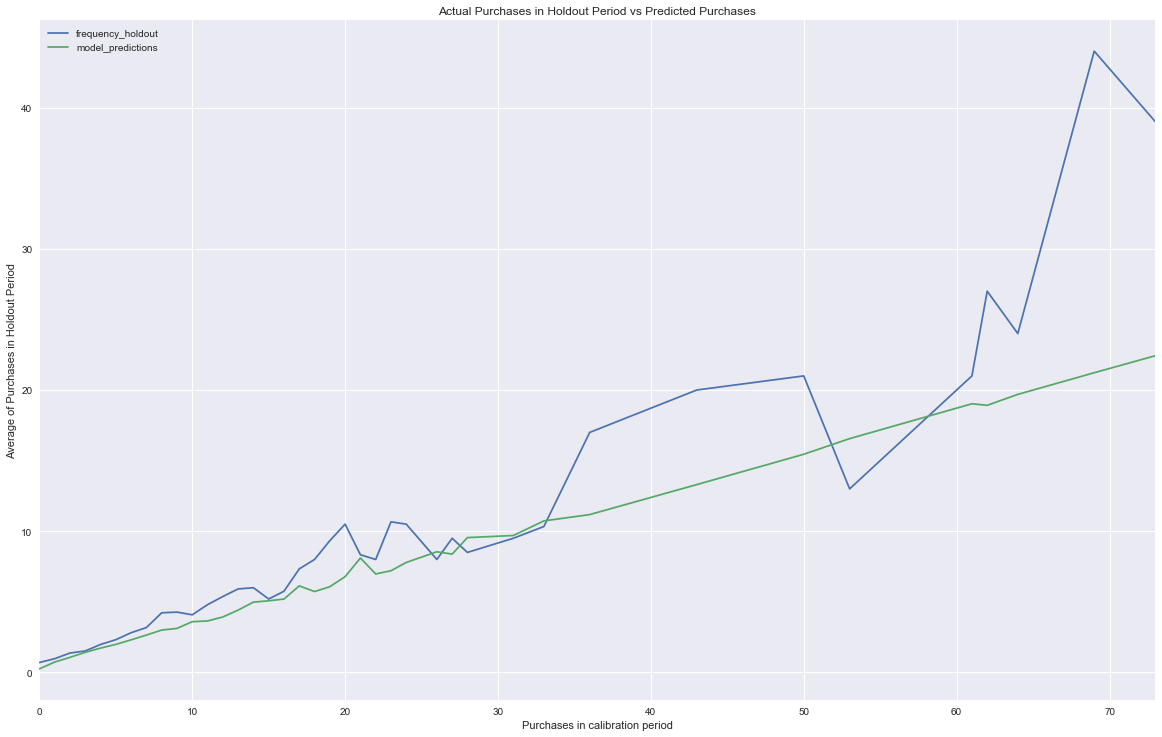

In [95]:
from lifetimes.utils import calibration_and_holdout_data
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

summary_cal_holdout = calibration_and_holdout_data(online_sales, 'CustomerID', 'InvoiceDate', 
 calibration_period_end='2011-09-01',
 observation_period_end='2011-12-09' ) # Separate the data into holdout/calibration
bgf.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal']) # fit the model on calibration data
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout, n=40)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 12.5)

In this plot, the data is separated in calibration and holdout period. The plot groups all customers in the calibration period by their number of repeat purchases (x-axis) and then averages over their repeat purchases in the holdout period (y-axis). The green and blue line presents the model prediction and actual result of the y-axis respectively. The model is accurate in predicting the customer base's behavior on the smaller repeated purchases. As it gets larger, the model consistently under estimates the average repeat purchases pattern. This is probably due to lack of data for those large repeart purchasing customers.

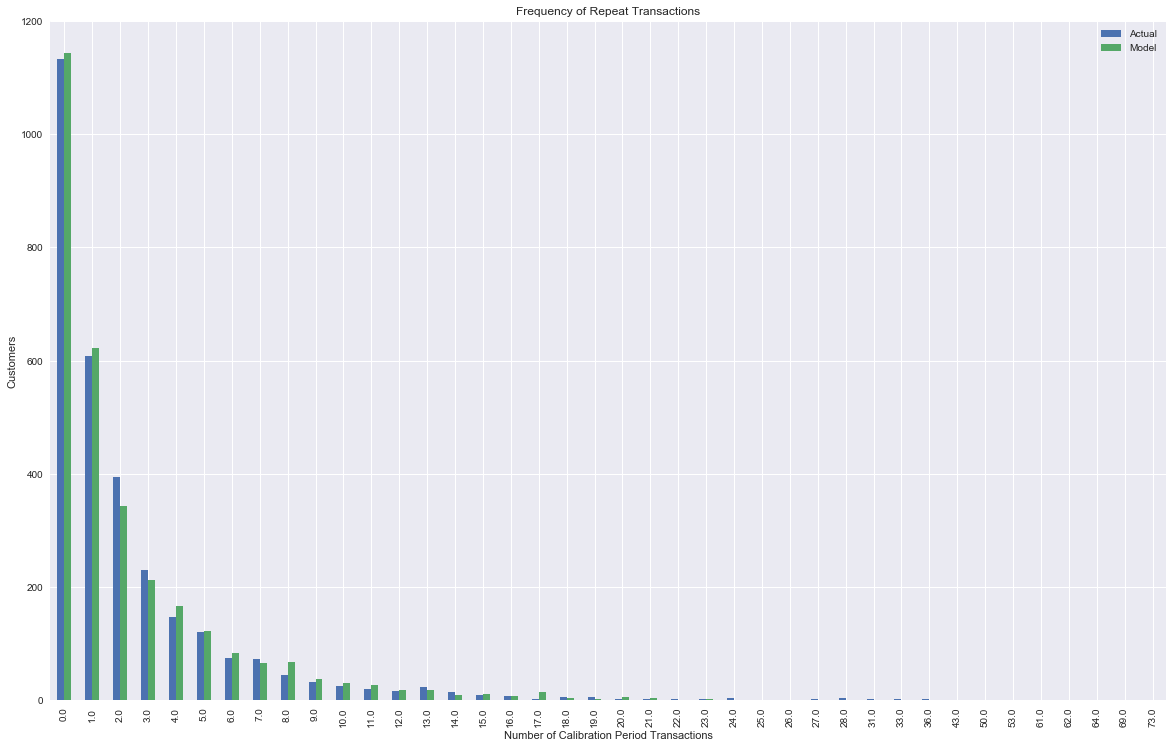

In [96]:
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf, max_frequency=50)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 12.5)

In this next figure, the plot shows the expected number of customers that are going to repeat purchase n times in the future. For each number of repeat purchases (x-axis), the plot shows both what the model predicted and what the actual numbers were. 

### Probability of customer being 'Alive'

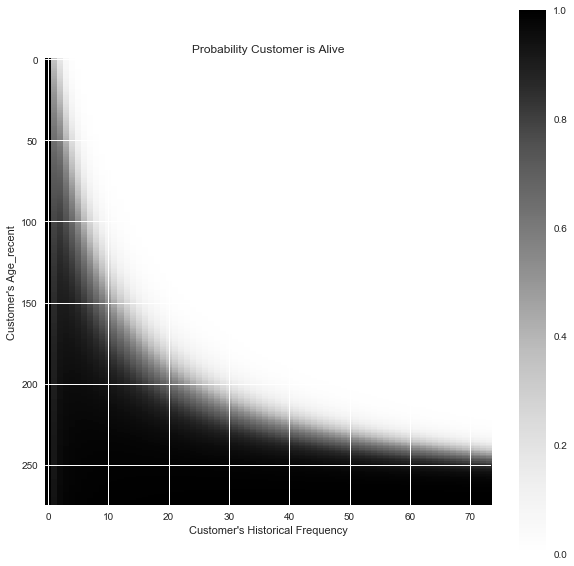

In [97]:
from lifetimes.plotting import plot_probability_alive_matrix
plot_probability_alive_matrix(bgf, title='Probability Customer is Alive', ylabel="Customer's Age_recent")

This plot maps the probability that the customer is alive given the customer age during the most recent purchase and the historical frequency. Interesting observation here is that for the same Age_recent, customer with more historical frequency are likely to be considered 'dead'. This model clearly shows customer behavior as customers making more frequent purchases is more likely to die off if there is a longer period of inactivity than the previous intervals.

### Individual customer's probability of being 'Alive'

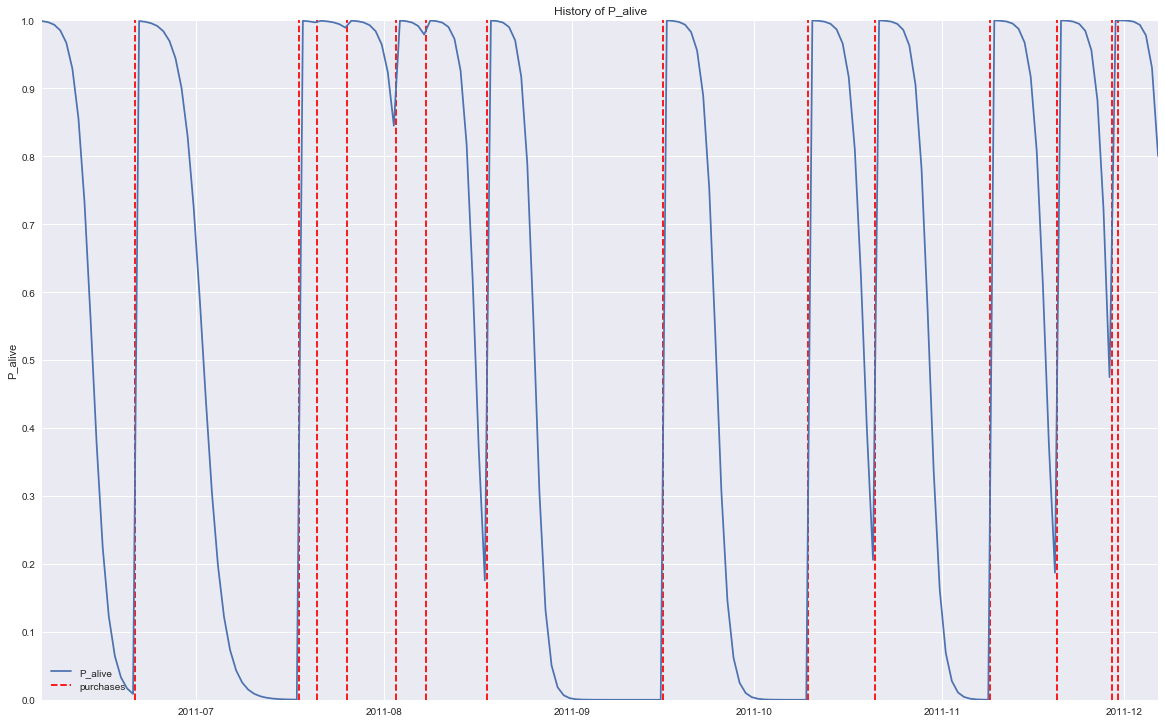

In [98]:
from lifetimes.plotting import plot_history_alive

days_since_birth = 185
sp_trans = online_sales[online_sales['CustomerID'] == 15152]
plot_history_alive(bgf, days_since_birth, sp_trans, 'InvoiceDate')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 12.5)

This plot shows the historical probability of an individual customer being alive between the intervals of purchase. This can help to provide timely sales effort without letting customers feeling irritated.

### Ranking customers based on expected frequency for the next period

In [99]:
t = 365
RFM['Expected_frequency'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, RFM['Frequency'], RFM['Age_recent'], RFM['Age_total'])
RFM.sort_values(by='Expected_frequency').tail(100)

,Recency,Frequency,Monetary,Cluster,Age_recent,Age_total,Expected_frequency
CustomerID,,,,,,,
13685,2.047222,7,3119.44,2,57.945833,59.993056,24.517490
16168,10.002778,28,3770.60,2,359.046528,369.049306,24.578075
13050,8.806250,28,5684.61,2,357.331944,366.138194,24.754858
16779,1.913194,28,10454.05,2,364.206944,366.120139,24.786773
18241,9.027083,18,2058.09,2,208.116667,217.143750,24.941785
14534,2.020833,25,4075.35,2,316.022222,318.043056,25.054670
15152,9.011806,16,4684.24,2,177.872222,186.884028,25.060294
17434,1.981250,9,2333.42,2,82.973611,84.954861,25.312225
15769,6.956250,29,51823.72,2,363.941667,370.897917,25.342564


### Estimating average transaction value per customer using the Gamma-Gamma model

Gamma-Gamma is a probabilistic model that takes in the value of each transaction in addition to the BG/NBD model to estimate future value.

In [100]:
# obtain average transaction value for each customer
atv = online_sales.groupby('CustomerID')['Amount'].mean()

In [101]:
atv = atv.to_frame()

In [102]:
atv.rename(columns={'Amount':'Average transaction value'}, inplace=True)

In [103]:
atv.describe()

,Average transaction value
count,3950.000000
mean,28.802605
std,131.144428
min,-4287.630000
25%,10.135031
50%,16.555603
75%,23.034602
max,3861.000000


In [104]:
RFM = pd.concat([RFM, atv], axis=1, join='inner')

In [105]:
RFM

,Recency,Frequency,Monetary,Cluster,Age_recent,Age_total,Expected_frequency,Average transaction value
CustomerID,,,,,,,,
12346,325.105556,2,0.000000e+00,1,0.011111,325.116667,0.306698,0.000000e+00
12747,1.927083,11,4.196010e+03,2,366.955556,368.882639,10.010665,4.073796e+01
12748,0.020139,224,2.907210e+04,2,372.980556,373.000694,191.280189,6.262839e+00
12749,3.120139,8,3.868200e+03,2,209.771528,212.891667,11.764809,1.674545e+01
12820,2.900694,4,9.423400e+02,2,323.109722,326.010417,4.434176,1.597186e+01
12821,213.873611,1,9.272000e+01,1,0.000000,213.873611,0.987928,1.545333e+01
12822,70.114583,3,9.189800e+02,0,16.845833,86.960417,7.506020,1.955277e+01
12823,74.218056,5,1.759500e+03,0,221.805556,296.023611,5.681038,3.519000e+02
12824,59.000000,1,3.971200e+02,1,0.000000,59.000000,4.247588,1.588480e+01


Gamma-Gamma model assumes that there is is no relationship between monetary value and the purchase frequency. Therefore, we need to check whether the Pearson correlation between the two vectors is close to 0 in order to use this model

In [106]:
RFM[['Average transaction value', 'Frequency']].corr()

,Average transaction value,Frequency
Average transaction value,1.000000,0.033356
Frequency,0.033356,1.000000


In [107]:
from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef = 0.001)
ggf.fit(RFM['Frequency'][RFM['Average transaction value']>0], RFM['Average transaction value'][RFM['Average transaction value']>0])
ggf

<lifetimes.GammaGammaFitter: fitted with 3905 subjects, p: 2.64, q: 1.54, v: 7.37>

In [108]:
eatv = ggf.conditional_expected_average_profit(RFM['Frequency'], RFM['Average transaction value'])

In [109]:
RFM['Expected avg transaction value'] = eatv

In [115]:
RFM.sort_values(by='Expected avg transaction value').tail(100)

,Recency,Frequency,Monetary,Cluster,Age_recent,Age_total,Expected_frequency,Average transaction value,Expected avg transaction value,Customer lifetime value
CustomerID,,,,,,,,,,
15171,324.006944,2,1034.50,0,6.877083,330.884028,0.397289,147.785714,137.332795,8.395006e+00
18246,23.041667,2,596.10,3,209.912500,232.954167,3.294454,149.025000,138.456425,4.827110e+03
17389,0.132639,43,31300.08,2,338.684722,338.817361,40.396768,139.732500,139.237200,8.674058e+04
15316,326.052083,1,165.00,1,0.000000,326.052083,0.471482,165.000000,142.939889,3.331446e-147
14609,71.996528,4,601.56,0,224.030556,296.027083,4.691270,150.390000,144.780258,7.815821e+03
14548,150.020833,2,652.80,0,167.153472,317.174306,2.353984,163.200000,151.308560,3.165623e+03
15267,21.868056,5,1717.36,0,160.232639,182.100694,8.614500,156.123636,151.364747,1.599463e+04
16144,246.111111,1,175.20,1,0.000000,246.111111,0.783975,175.200000,151.398588,5.921010e-147
17331,123.037500,1,175.20,1,0.000000,123.037500,2.119605,175.200000,151.398588,2.104286e-146


### Estimating customer lifetime value using the Gamma-Gamma model

Customer lifetime value is a prediction of the present value of net profit attributed to the entire future relationship with a customer. 

In [111]:
bgf2 = BetaGeoFitter(penalizer_coef=0.001)
bgf2.fit(RFM['Frequency'], RFM['Age_recent'], RFM['Age_total'])


clv = ggf.customer_lifetime_value(
    bgf2, #the model to use to predict the number of future transactions
    RFM['Frequency'],
    RFM['Age_recent'],
    RFM['Age_total'],
    RFM['Average transaction value'],
    time=365, # days
    discount_rate=0.00010959 # daily discount rate ~ 4% annually
)

In [112]:
clv

CustomerID
12346     2.850947e-07
12747     6.022701e+03
12748     1.906839e+04
12749     2.752004e+03
12820     9.789174e+02
12821    9.575271e-148
12822     1.440425e+02
12823     2.222061e+04
12824    1.018647e-146
12826     1.743633e+03
12827     3.191036e+03
12828     3.192454e+03
12829     8.758827e+00
12830     2.319694e+04
12831    9.037942e-148
12832     9.295113e+02
12833    2.115910e-147
12834    6.237221e-148
12836     8.718837e+02
12837    1.148842e-147
12838     2.074695e+02
12839     3.887113e+03
12840     1.174935e+02
12841     3.167045e+03
12842     8.897688e+02
12843     1.767052e+03
12844     4.531668e+02
12845     3.816169e-01
12847    4.422073e-146
12849     6.887867e+02
             ...      
18245     1.615971e+03
18246     4.827110e+03
18248     3.448034e+02
18249    8.080759e-146
18250     2.276427e+00
18251    6.010941e-146
18252     3.242319e+02
18255    5.109880e-147
18256   -8.560219e-149
18257     3.201604e+03
18259     2.103841e+03
18260     2.453972e+02


In [113]:
RFM['Customer lifetime value'] = clv

In [114]:
RFM.sort_values(by='Customer lifetime value').tail(100)

,Recency,Frequency,Monetary,Cluster,Age_recent,Age_total,Expected_frequency,Average transaction value,Expected avg transaction value,Customer lifetime value
CustomerID,,,,,,,,,,
17386,7.056250,6,2686.42,2,157.970139,165.026389,11.001903,95.943571,93.947798,13325.194572
16523,1.154861,28,9295.67,2,313.875000,315.029861,28.217583,31.193523,31.226988,13325.939232
14735,3.027778,34,5807.69,2,354.836111,357.863889,30.572953,28.330195,28.375022,13376.500990
12882,8.854861,2,1463.04,3,24.205556,33.060417,10.948215,112.541538,105.377740,13569.964954
13576,9.885417,20,6703.30,2,362.923611,372.809028,17.562001,51.563846,51.403026,13686.367550
16989,6.840278,6,1133.25,2,143.311111,150.151389,11.805342,94.437500,92.491686,14023.663103
17809,15.992361,15,4627.62,2,357.138194,373.130556,13.282890,72.306562,71.812043,14187.290583
13324,31.873611,12,7072.80,2,328.250694,360.124306,11.020117,91.854545,90.908793,14254.132596
16168,10.002778,28,3770.60,2,359.046528,369.049306,24.578075,38.086869,38.070023,14298.076869


## Conclusion on predictive analytics

1. Churn prevention:
By looking at the probability of customers being 'alive', visualising individual client's historical probability of being 'alive' and knowing customers' expected frequency of purchase, company can prevent churn with timely marketing and sales effort.

2. Customer lifetime value:
Customers that are going to be the most profitable can be identified. Budgets and spending can be optimized given the predicted CLV. The majority of the customers with the highest CLV happens to be in cluster 2 (Top customers based on segmentation). Company can work towards increasing their share of business with this group of customers. 



## Further studies

The RFM based customer segmentation using k-means clustering is successful in clustering customers of different lifecycles. This can be applied to any transactional data. A different matrix can be used to segment customers as well. For example, in a banking setting, customers can be segmented based on how digitally savvy they are and their financial knowledge. Data such as customers' online vs physical branch traffic and portfolio details can be obtained for doing such segmentations. Customers can receive more tailored made marketing effort based on their segments.

Another interesting area to expand upon is the predictive CLV. Since the net profit of all customers can be predicted, it is possible to estimate the value of the company through a discounted cash flow valuation model. 

